# KNN

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy  as np
import pandas as pd
import random

from sklearn import datasets
from scipy.spatial.distance import cdist

In [142]:
class KNN:
    def __init__(self, k=2, kernel=None)-> None:
        """
            Arguments:
                k, int - number of nambers to choose from
                kernel - a kernel function to calculate distance
        """
        self.trainX = None
        self.labels = None
        self.k = k
        self.kernel = kernel

    def _calc_distance(self, A, B) -> None:
        dist = np.sqrt(np.sum((np.expand_dims(A, axis=1)-\
                                np.expand_dims(B, axis=0))**2, axis=2))
        return dist
        

    def fit(self, train_set, labels) -> None:
        self.trainX = train_set
        if len(train_set.shape) == 1:
            self.trainX = np.expand_dims(X, axis=0)
        self.labels=labels
        

    def predict(self, testX) -> None:
        X = testX
        if len(testX.shape) == 1:
            X = np.expand_dims(X, axis=0)
        dist = self._calc_distance(X, self.trainX)
        if self.kernel is not None:
            dist = self.kernel(dist)
        values = np.expand_dims(self.labels, axis=1)[np.argsort(dist, axis=1)[:, :self.k]]
        values = np.reshape(values, (X.shape[0], self.k))
        scores_ = np.unique(self.labels)[np.argmax(np.vstack([np.sum(np.where(values==target, 1, 0), 
                                                                axis=-1) for target in np.unique(self.labels)]).T, axis=1)]
        return scores_

## Kernels

In [134]:
def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

In [135]:
def K1(distance, h=0.05):
    ret = np.array(distance)/h
    return (1./(ret + 1.)) * (np.abs(ret) <= 1)

In [136]:
def K_exp(distance, h=0.05):
    ret = np.array(distance)/h
    return np.exp(ret) * (np.abs(ret) <= 1)

In [137]:
def Kn(distance, h=0.05, d=1):
    ret = np.array(distance)/h
    return (ret + 1.)**d * (np.abs(ret) <= 1)

In [138]:
def Ksigmoid(distance, h=0.05, r=1):
    ret = np.array(distance)/h
    return np.tanh(ret + 1) * (np.abs(ret) <= 1)

## Dataset

In [130]:
iris = datasets.load_iris()
trainX = iris.data
trainY = iris.target

In [131]:
testX = []
testY = []

#забираем 15 штук на валидацию, выбрал рандомно
indexes = np.random.randint(0, len(trainX), 15)

for index in indexes:
  testX.append(np.array(trainX[index]))
  testY.append(np.array(trainY[index]))

trainX = np.delete(trainX, indexes, axis=0)
trainY = np.delete(trainY, indexes, axis=0)

In [132]:
testX = np.array(testX)
testY = np.array(testY)

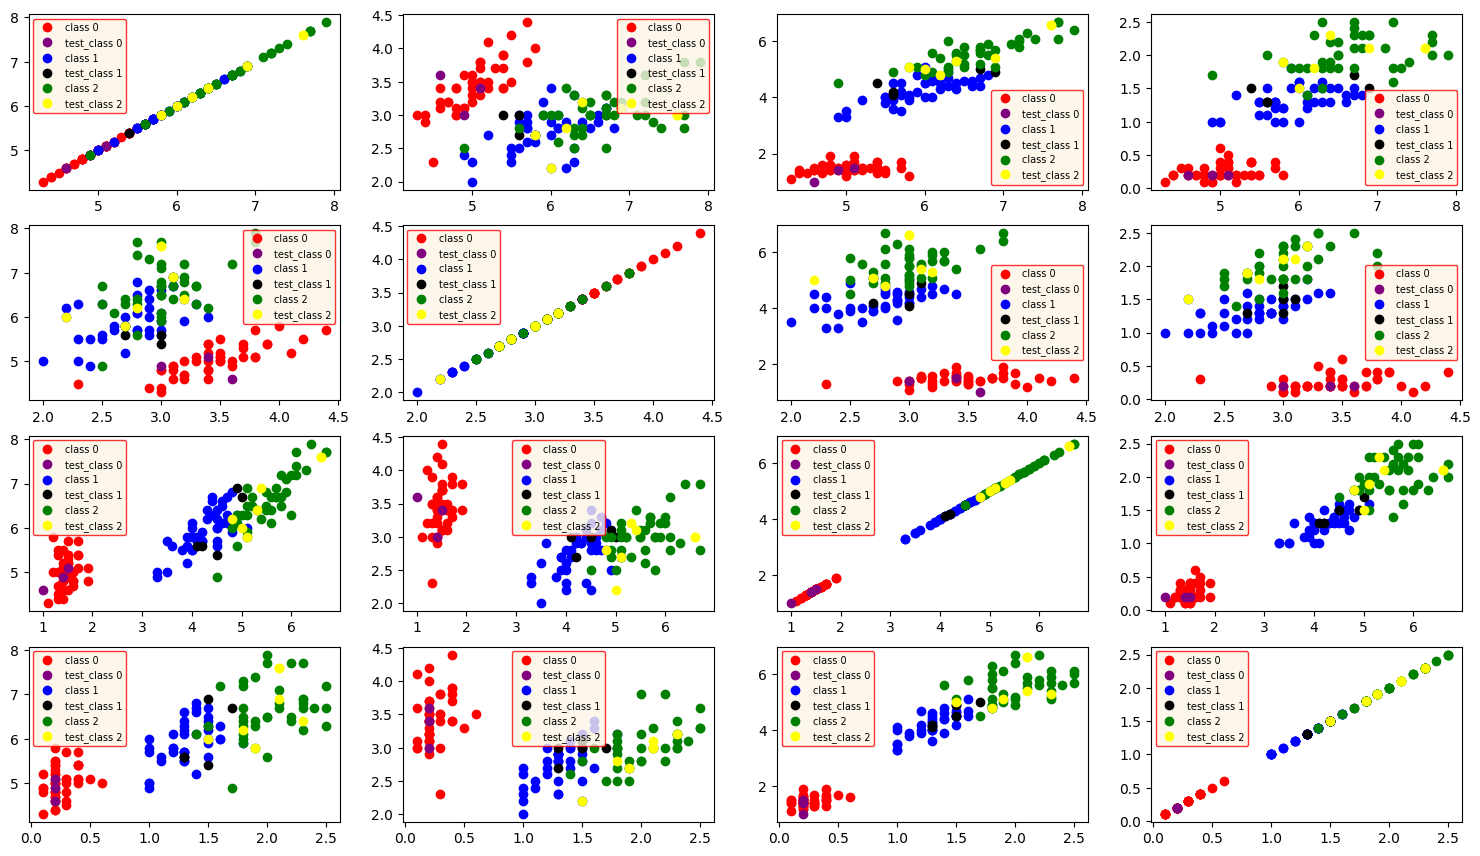

In [101]:
fig, axs = plt.subplots(nrows=4, ncols=4)

colors = ['red', 'blue', 'green']
test_colors = ['purple', 'black', 'yellow']

for i in range(4):
    for j in range(4):
        for k in np.unique(trainY):
            axs[i%4, j%4].plot(trainX[trainY==k, i], trainX[trainY==k, j], 'o', label='class {}'.format(k), color = colors[k])
            axs[i%4, j%4].plot(testX[testY==k, i], testX[testY==k, j], 'o', label='test_class {}'.format(k), color = test_colors[k])
            axs[i%4, j%4].legend(fontsize=7, ncol=1, facecolor='oldlace', edgecolor='r')

fig.set_size_inches(18.5, 10.5)
plt.show()
plt.close()

## Train

In [144]:
# knn = KNN(k=3, kernel=Ksigmoid)
knn = KNN(k=3)
knn.fit(trainX, trainY)
prediction = knn.predict(testX)
print(f'Accuracy = {np.where(prediction == testY, 1, 0).sum() / len(testY):.2f}')

Accuracy = 0.93


# Decision Tree

In [146]:
class DecisionTree:
    def __init__(self):
        self.criterion = None
        self.max_depth = None
        self.min_samples_leaf = None
        self.min_samples_split = None
        self.criterions = {'Gini': self.gini, 'Entropy': self.entropy, 'IG': self.information_gain}

    def fit(self, trainX, trainY, criterion='Gini', max_depth=20, min_samples_leaf=5, min_samples_split=5):
        self.criterion = self.criterions[criterion]
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        pass

    def gini(self):
        """
            Индекс Джини: math: `$Q = 1 - \Sigma_{i=0}^np_i^2$`,
            суммируем вероятности по всем классам в сплите и хотим его минимизировать.
        """
        pass

    def entropy(self):
        """
            Энтропия: math: `$H = -\Sigma_{i=0}^n\frac{N_i}{N}log\frac{N_i}{N}$`
            так же суммируем по всем классам в срезе, если все элементы одного класса - логарифм дает 0
        """
        pass

    def information_gain(self):
        """
            Прирост информации, или Information Gane (IG), определяется как уменьшении энтропии. 
            Тогда  math: `$IG = S_0 - \sum\frac{N_i}{N}S_i$`, где  𝑖  - номер выборки из разбиения. 
            Таким образом выбирается такое разбиение, в котором достигается максимум прироста информации.
        """
        pass

    def predict(self, testX):
        pass